# Regressão logística
    Diferentemente da regressão linear, a regressão logística não lida com a previsão linear de valores em meio a dados correlacionados, 
    mas sim, com a probabilidade de um evento ocorrer ou não.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

## Será realizada uma regressão logística para apurar quais são os candidatos com maior probabilidade de serem eleitos, utilizando dados fictícios.
    O objetivo é saber quais candidatos tem chances de serem eleitos levando em conta a possibilidade de investimento.

In [2]:
base = pd.read_csv('/content/Eleicao.csv' , sep= ';')
base.head()

,CANDIDATO,SITUACAO,DESPESAS
0,George Turner,0,10
1,Victor Johnson,0,100
2,Jerry Perry,1,1600
3,Shirley Cook,1,1500
4,Carolyn Bailey,1,3300


    Visualização de algumas estatísticas dos dados, e criação de um gráfico de dispersão, 

,SITUACAO,DESPESAS
count,47.000000,47.000000
mean,0.510638,1085.744681
std,0.505291,870.968338
min,0.000000,10.000000
25%,0.000000,300.000000
50%,1.000000,800.000000
75%,1.000000,1700.000000
max,1.000000,3300.000000


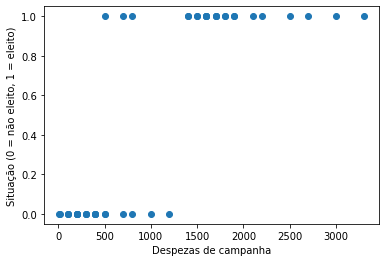

In [3]:
plt.scatter(base.DESPESAS , base.SITUACAO)
plt.xlabel('Despezas de campanha')
plt.ylabel('Situação (0 = não eleito, 1 = eleito)')
base.describe()

    Verificando o coeficiente de correlação entre as despesas e a situação

In [4]:
np.corrcoef(base.DESPESAS, base.SITUACAO)
# Como se pode notar, a correlação existe e é forte, 81%.

array([[1.        , 0.81218717],
       [0.81218717, 1.        ]])

    Separação dos valores da variável independente x (despesas) da dependente y (situação), com a transformação de ambos em matrizes.

In [5]:
x = base.iloc[: , 2].values
x = x[: , np.newaxis]
y = base.iloc[: , 1].values
x

array([[  10],
       [ 100],
       [1600],
       [1500],
       [3300],
       [ 200],
       [1800],
       [1700],
       [ 300],
       [1800],
       [ 100],
       [ 500],
       [3000],
       [  20],
       [ 200],
       [ 700],
       [1600],
       [1900],
       [ 100],
       [ 400],
       [2700],
       [ 200],
       [ 300],
       [ 500],
       [2500],
       [1400],
       [ 700],
       [1700],
       [1400],
       [1600],
       [ 400],
       [ 200],
       [1600],
       [2200],
       [1900],
       [ 200],
       [1200],
       [1700],
       [1500],
       [2100],
       [ 400],
       [ 800],
       [ 400],
       [ 500],
       [1000],
       [ 300],
       [ 800]])

    Criação e treinamento do modelo de regressão logística, com visualização dos valores da inclinação (coef_) 
    e interceptação (intercept_) da reta da regreção.

In [6]:
modelo = LogisticRegression()
modelo.fit(x , y)
modelo.coef_

array([[0.00498364]])

In [7]:
modelo.intercept_

array([-4.60287217])

    Produção de dados intervalados dentro dos limites dos gastos, para a produção da função sigmoide.

In [8]:
x_teste = np.linspace(100 , 3000 , 100)

    Implementação da função sigmoide.

In [9]:
def model(x):
  return 1 / (1 + np.exp(-x))

    Previsões para a criação do modelo e impressão do novo gráfico, agora, com a linha representando o modelo.
    

Text(0, 0.5, 'Situação (0 = não eleito, 1 = eleito)')

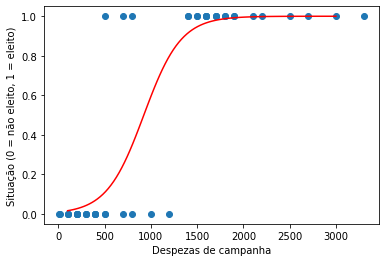

In [10]:
r = model(x_teste * modelo.coef_ + modelo.intercept_).ravel()
plt.scatter(base.DESPESAS, base.SITUACAO)
plt.plot(x_teste, r , color = 'red')
plt.xlabel('Despezas de campanha')
plt.ylabel('Situação (0 = não eleito, 1 = eleito)')

    Utilizando o modelo para realizar previsões com outro banco de dados.

In [11]:
base_previsoes = pd.read_csv('/content/NovosCandidatos.csv' , sep= ';')
base_previsoes

,CANDIDATO,DESPESAS
0,A,0
1,B,10
2,C,200
3,D,500
4,E,900
5,F,1500
6,G,3000


    Separação dos valores referentes às despesas e transformando-os em formato de matriz.

In [12]:
despesas = base_previsoes.iloc[: , 1].values
despesas = despesas.reshape(-1 , 1)

    Realizando a previsão.

In [13]:
previsoes_teste = modelo.predict(despesas)
previsoes_teste

array([0, 0, 0, 0, 0, 1, 1])

    Criando um objeto em forma de matriz para visualizar quais são os candidatos que possuem chance de serem eleitos 
    levando em conta seu investimento.

In [14]:
base_previsoes = np.column_stack((base_previsoes, previsoes_teste))
base_previsoes

array([['A', 0, 0],
       ['B', 10, 0],
       ['C', 200, 0],
       ['D', 500, 0],
       ['E', 900, 0],
       ['F', 1500, 1],
       ['G', 3000, 1]], dtype=object)